In [1]:
import sys
sys.path.append('/teams/YingChiLab_1702378116/KexuanKong/sc-GPT/TOSICA-main')  # 替换为实际路径

In [2]:
import TOSICA
import scanpy as sc
import numpy as np
import warnings 
warnings.filterwarnings ("ignore")

Information of GPU

In [3]:
import torch
print(torch.__version__)
print(torch.cuda.get_device_capability(device=None),  torch.cuda.get_device_name(device=None))

2.2.0+cu121
(8, 6) NVIDIA RTX A2000 12GB


Reference data

In [4]:
ref_adata = sc.read('c_data.h5ad')
ref_adata = ref_adata[:,ref_adata.var_names]
print(ref_adata)
print(ref_adata.obs.celltype.value_counts())

View of AnnData object with n_obs × n_vars = 7844 × 3000
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[sampling site]', 'Sample Characteristic Ontology Term[sampling site]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[organism status]', 'Sample Characteristic Ontology Term[organism status]', 'Sample Characteristic[cause of death]', 'Sample Characteristic Ontology Term[cause of death]', 'Sample Characteristic[clinical history]', '

Query data

In [9]:
query_adata = sc.read('filtered_ms_adata.h5ad')
query_adata = query_adata[:,query_adata.var_names]
print(query_adata)
print(query_adata.obs.celltype.value_counts())

View of AnnData object with n_obs × n_vars = 13468 × 3000
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[sampling site]', 'Sample Characteristic Ontology Term[sampling site]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[organism status]', 'Sample Characteristic Ontology Term[organism status]', 'Sample Characteristic[cause of death]', 'Sample Characteristic Ontology Term[cause of death]', 'Sample Characteristic[clinical history]', 

Training on pre-weights of 'human_gobp' mask:

In [10]:
!cp ./hGOBP_demo/model-0.pth ./pre_weights.pth

In [11]:
TOSICA.train(ref_adata, gmt_path='human_gobp', label_name='celltype',epochs=3,project='human_gobp_202505124')
!ls ./hGOBP_demo

cpu
Mask loaded!
Model builded!


[valid epoch 2] loss: 1.416, acc: 0.497: 100%|██████████| 1356/1356 [01:38<00:00, 13.80it/s]


Training finished!
gene2token_weights.csv	mask.npy     model-1.pth  pathway.csv
label_dictionary.csv	model-0.pth  model-2.pth


In [14]:
TOSICA.train(ref_adata, gmt_path='human_gobp', label_name='celltype',pre_weights='./hGOBP_demo/model-2.pth',epochs=1)

cpu
Mask loaded!
<All keys matched successfully>
Model builded!


[valid epoch 0] loss: 0.718, acc: 0.736: 100%|██████████| 1356/1356 [01:42<00:00, 13.26it/s]


Training finished!


In [32]:
TOSICA.train(ref_adata, gmt_path='human_gobp', label_name='celltype',pre_weights='./human_gobp_20250524/model-0.pth',epochs=2)

cpu
Mask loaded!
<All keys matched successfully>
Model builded!


[valid epoch 1] loss: 0.339, acc: 0.879: 100%|██████████| 1356/1356 [01:45<00:00, 12.84it/s]


Training finished!


In [18]:
new_all_adata.obs

,Prediction,Probability,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
SRR9123033-AAACCTGAGCTAGCCC,oligodendrocyte A,0.604285,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS1,female,http://purl.obolibrary.org/obo/PATO_0000383,35 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,premotor cortex,http://purl.obolibrary.org/obo/UBERON_0016634,oligodendrocyte,http://purl.obolibrary.org/obo/CL_0000128,oligodendrocyte A,http://purl.obolibrary.org/obo/CL_0000128,1,oligodendrocyte A
SRR9123033-AAACCTGCAGACGCCT,PVALB-expressing interneuron,0.391183,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS1,female,http://purl.obolibrary.org/obo/PATO_0000383,35 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,premotor cortex,http://purl.obolibrary.org/obo/UBERON_0016634,cortical interneuron,http://purl.obolibrary.org/obo/CL_0008031,PVALB-expressing interneuron,http://purl.obolibrary.org/obo/CL_4023018,1,PVALB-expressing interneuron
SRR9123033-AAAGATGGTAGCGTAG,mixed glial cell?,0.678432,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS1,female,http://purl.obolibrary.org/obo/PATO_0000383,35 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,premotor cortex,http://purl.obolibrary.org/obo/UBERON_0016634,oligodendrocyte,http://purl.obolibrary.org/obo/CL_0000128,oligodendrocyte A,http://purl.obolibrary.org/obo/CL_0000128,1,oligodendrocyte A
SRR9123033-AAAGATGGTGCCTGGT,mixed glial cell?,0.735993,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS1,female,http://purl.obolibrary.org/obo/PATO_0000383,35 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,premotor cortex,http://purl.obolibrary.org/obo/UBERON_0016634,oligodendrocyte precursor cell,http://purl.obolibrary.org/obo/CL_0002453,oligodendrocyte precursor cell,http://purl.obolibrary.org/obo/CL_0002453,1,oligodendrocyte precursor cell
SRR9123033-AAAGTAGCACCAGGTC,mixed glial cell?,0.611712,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS1,female,http://purl.obolibrary.org/obo/PATO_0000383,35 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,premotor cortex,http://purl.obolibrary.org/obo/UBERON_0016634,oligodendrocyte,http://purl.obolibrary.org/obo/CL_0000128,oligodendrocyte A,http://purl.obolibrary.org/obo/CL_0000128,1,oligodendrocyte A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR9123052-TTTGGTTCATCCGGGT,cortical layer 2-3 excitatory neuron B,0.217339,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS9,male,http://purl.obolibrary.org/obo/PATO_0000384,55 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,cerebral cortex,http://purl.obolibrary.org/obo/UBERON_0000956,cortical layer 5-6 excitatory neuron,NaN,cortical layer 5-6 excitatory neuron,NaN,1,cortical layer 5-6 excitatory neuron
SRR9123052-TTTGGTTCATCGATGT,cortical layer 2-3 excitatory neuron A,0.269457,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,MS9,male,http://purl.obolibrary.org/obo/PATO_0000384,55 year,NaN,human adult stage,...,multiple sclerosis,http://purl.obolibrary.org/obo/MONDO_0005301,cerebral cortex,http://purl.obolibrary.org/obo/

In [33]:
model_weight_path = './human_gobp_20250524/model-1.pth'
new_all_adata = TOSICA.pre(query_adata, model_weight_path = model_weight_path,project='human_gobp_20250524')

cpu
0
10000
13468


In [34]:
# 只保留指定列
new_all_adata.obs = new_all_adata.obs[["Prediction", "Probability", "celltype"]]
new_all_adata.write('finetune_ms_attn.h5ad')
new_all_adata

AnnData object with n_obs × n_vars = 13468 × 299
    obs: 'Prediction', 'Probability', 'celltype'

In [35]:
new_adata = sc.read('finetune_ms_attn.h5ad')

In [36]:
new_adata

AnnData object with n_obs × n_vars = 13468 × 299
    obs: 'Prediction', 'Probability', 'celltype'

In [37]:
new_adata.raw = new_adata
sc.pp.filter_genes(new_adata, min_counts=1)
# 2. 不过滤细胞（默认行为）
# 注意：如果之前有过滤过细胞的代码，请注释掉
# 3. 归一化
sc.pp.normalize_total(new_adata, target_sum=1e4)
# 4. log1p
sc.pp.log1p(new_adata)
# 5. 不进行 HVG 筛选
# 不执行 sc.pp.highly_variable_genes()
# 6. 可选：是否 binning，看你是否需要完全一致（略）
# PCA 和 UMAP 保持一致设置
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pp.neighbors(new_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(new_adata, random_state=0)

In [38]:
from sklearn.metrics import classification_report

# 确保 Prediction 和 Celltype 是字符串类型（避免 pandas 的分类对不上）
y_pred = new_adata.obs['Prediction'].astype(str)
y_true = new_adata.obs['celltype'].astype(str)

# 生成完整的分类报告
report = classification_report(y_true, y_pred, digits=3)
print(report)

report_dict = classification_report(y_true, y_pred, output_dict=True)

macro_avg_f1 = report_dict['macro avg']['f1-score']
macro_avg_recall = report_dict['macro avg']['recall']
macro_avg_precision = report_dict['macro avg']['precision']

weighted_avg_f1 = report_dict['weighted avg']['f1-score']
weighted_avg_recall = report_dict['weighted avg']['recall']
weighted_avg_precision = report_dict['weighted avg']['precision']

# 输出总体的F1 score, recall, precision
print(f"Macro Average F1: {macro_avg_f1:.4f}")
print(f"Macro Average Recall: {macro_avg_recall:.4f}")
print(f"Macro Average Precision: {macro_avg_precision:.4f}")

print(f"Weighted Average F1: {weighted_avg_f1:.4f}")
print(f"Weighted Average Recall: {weighted_avg_recall:.4f}")
print(f"Weighted Average Precision: {weighted_avg_precision:.4f}")

                                        precision    recall  f1-score   support

          PVALB-expressing interneuron      0.898     0.679     0.773       878
            SST-expressing interneuron      0.486     0.725     0.582       258
           SV2C-expressing interneuron      0.674     0.930     0.781       344
            VIP-expressing interneuron      0.923     0.845     0.882      1158
                             astrocyte      0.877     0.913     0.894      1330
cortical layer 2-3 excitatory neuron A      0.187     0.150     0.166       314
cortical layer 2-3 excitatory neuron B      0.783     0.495     0.607      2178
    cortical layer 4 excitatory neuron      0.484     0.411     0.444      1504
  cortical layer 5-6 excitatory neuron      0.519     0.614     0.562      1732
                      endothelial cell      0.678     0.929     0.784       170
                       microglial cell      0.200     0.068     0.101       118
               mixed excitatory neuron 

In [ ]:
输出的内容：
宏平均（Macro avg）: 这些是你不考虑每种细胞类型的数量，计算出的平均值。

加权平均（Weighted avg）: 考虑每个类别的样本数量，并根据它们的权重来计算平均值。

3. 结果解释：
Precision: 测试中正确预测为某一类的样本数占所有预测为该类的样本数的比例。

Recall: 测试中正确预测为某一类的样本数占所有实际为该类的样本数的比例。

F1 Score: Precision 和 Recall 的调和平均数，综合了两者的影响。公式：F1 = 2 * (precision * recall) / (precision + recall)。

4. 使用 macro avg 和 weighted avg：
Macro average 是每个类的指标平均值，它不受各个类别样本数量的影响。适用于对每个类别的表现平等关注的情况。

Weighted average 是对每个类的指标按照其样本数加权计算平均值。适用于样本数量不平衡的情况，可以给较大类更多的权重。

如果你只关心整体评估结果，使用 weighted avg 是更合适的选择，因为它考虑了不同类别的样本数。

In [44]:
# 🟦 提前准备足够的颜色（多准备几个以防不足）
col = np.array([
    "#4E79A7",  # 柔和蓝
  "#F28E2B",  # 橙金色
  "#E15759",  # 珊瑚红
  "#76B7B2",  # 薄荷绿
  "#59A14F",  # 草绿色
  "#EDC948",  # 柠檬黄
  "#B07AA1",  # 淡紫
  "#FF9DA7",  # 粉玫瑰
  "#9C755F",  # 摩卡棕
  "#BAB0AC",  # 淡灰褐
  "#8CD17D",  # 青草绿
  "#FAA43A",  # 亮橘
  "#D4A6C8",  # 淡粉紫
  "#6B4C9A",  # 深丁香紫
  "#F7C6C7",  # 樱花粉
  "#A1D99B",  # 柔绿
  "#FDD0A2",  # 杏桃色
  "#C6DBEF"   # 雾霭蓝
]).astype('<U7')

# 🟨 1. 提取两个列中所有的细胞类型
pred_types = new_adata.obs['Prediction'].astype('category').cat.categories.tolist()
cell_types = new_adata.obs['celltype'].astype('category').cat.categories.tolist()

# 🟩 2. 合并去重，生成统一的细胞类型顺序
all_types = list(dict.fromkeys(pred_types + cell_types))  # 保持顺序去重

# 🟥 3. 为每个细胞类型分配颜色
type_to_color = dict(zip(all_types, col[:len(all_types)]))

# 🟦 4. 设置 Prediction 列和颜色
new_adata.obs['Prediction'] = new_adata.obs['Prediction'].astype('category')
new_adata.obs['Prediction'] = new_adata.obs['Prediction'].cat.reorder_categories(pred_types, ordered=False)
new_adata.uns['Prediction_colors'] = [type_to_color[ct] for ct in pred_types]

# 🟧 5. 设置 Celltype 列和颜色
new_adata.obs['celltype'] = new_adata.obs['celltype'].astype('category')
new_adata.obs['celltype'] = new_adata.obs['celltype'].cat.reorder_categories(cell_types, ordered=False)
new_adata.uns['Celltype_colors'] = [type_to_color[ct] for ct in cell_types]




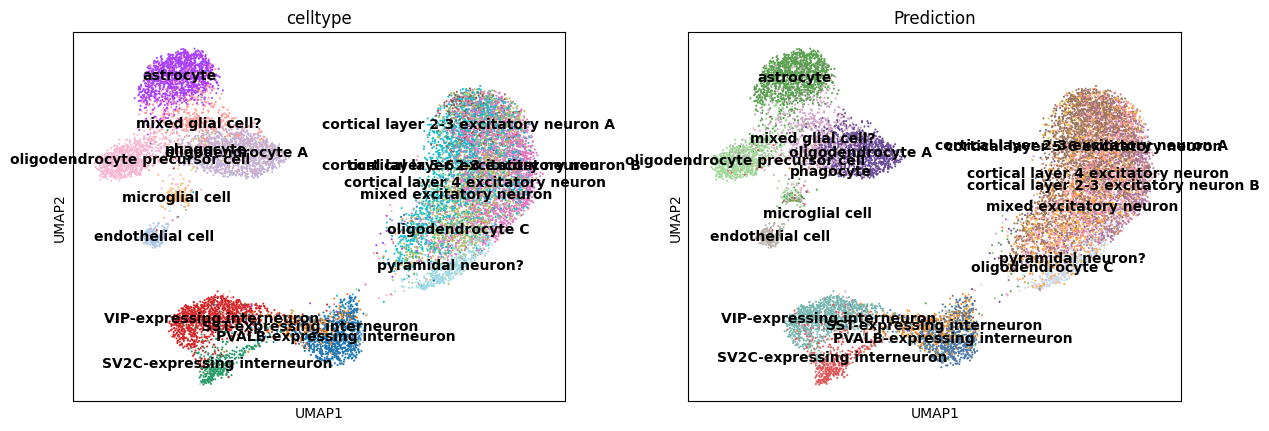

In [46]:
sc.pl.umap(new_adata, color=['celltype', 'Prediction'],legend_loc='on data')